## Pendulo Simple

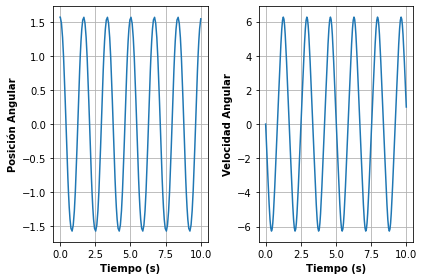

In [3]:
#Importacion de Librerias
import numpy as np 
from scipy.integrate import solve_ivp 
import matplotlib.pyplot as plt 

#Definicion de la funcion a integrar
def f(t,X):
    g = 9.8 
    l = 0.5
    theta=X[0]
    omega=X[1]
    dtheta=omega
    domega= -g*(np.sin(theta))/l
    return np.array([dtheta ,domega])

#Condiciones iniciales y resultado
X0 = [np.pi/2, 0] 
results = solve_ivp(f ,(0,10) , X0,rtol=1e-8) 

#Graficacion
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.plot(results.t, results.y[0]) 
ax1.set_ylabel('Posición Angular',fontweight='bold')
ax1.set_xlabel('Tiempo (s)',fontweight='bold')
ax1.grid()
ax2 = fig.add_subplot(1,2,2)
ax2.plot(results.t, results.y[1]) 
ax2.set_ylabel('Velocidad Angular', fontweight='bold')
ax2.set_xlabel('Tiempo (s)',fontweight='bold')
ax2.grid()
plt.tight_layout()


## Modelo SIR

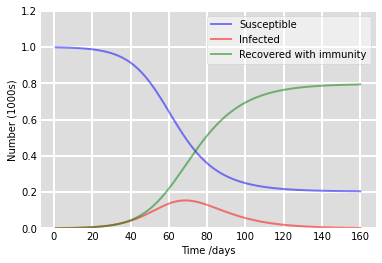

In [4]:
#Importacion de Librerias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Definicion de parametros iniciales
N = 1000
I0 = 1
R0 = 0
S0 = N - I0 - R0
beta = 0.2
gamma = 1/10

#Definicion del intervalo de tiempo
Total_dias = 160
num = 160
start = 1
t = np.linspace(start, Total_dias, num)

#Definicion de funcion a integrar
def f(y, t, beta, gamma):
    S, I, R = y[0], y[1], y[2]
    dS = - beta*S*I/N
    dI = beta*S*I/N - gamma*I
    dR = gamma*I
    return dS, dI, dR

#Condiciones iniciales y resultado
y0 = S0, I0, R0
ret = odeint(f, y0, t, args=(beta, gamma))
S, I, R = ret.T

#Graficacion
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible') 
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected') 
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity') 

ax.set_xlabel('Time /days') 
ax.set_ylabel('Number (1000s)') 
ax.set_ylim(0,1.2) 
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'): 
    ax.spines[spine].set_visible(False)
    
plt.show()


## Modelo SEIR

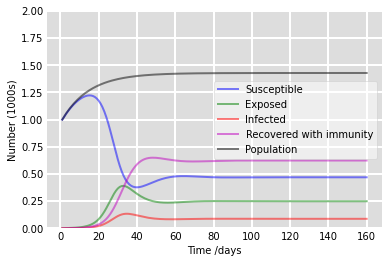

In [5]:
#Importacion de Librerias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Definicion de parametros iniciales
beta = 1.64
gamma = 0.5
mu = 0.07
nu = 0.1
alpha = 0.2
N0 = 1000
E0 = 0
I0 = 1
R0 = 0
S0 = N-E0-I0-R0

#Definicion del intervalo de tiempo
Tamano_grid = 160
Step = 160
t = np.linspace(1, Tamano_grid, Step)

#Definicion de funcion a integrar
def g(y, t, beta, gamma, mu, nu, alpha):
    S, E, I, R = y[0], y[1], y[2], y[3]
    dS = - beta*S*I/N + nu*N - mu*S
    dE = beta*S*I/N - alpha*E - mu*E
    dI = alpha*E - gamma*I - mu*I
    dR = gamma*I - mu*R

    return dS, dE, dI, dR

#Condiciones iniciales y resultado
y0 = S0, E0, I0, R0
ret = odeint(g, y0, t, args=(beta, gamma, mu, nu, alpha))
S, E, I, R = ret.T

#Graficacion
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/1000, 'g', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'm', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, (S+E+I+R)/1000, 'k', alpha=0.5, lw=2, label='Population')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,2)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
plt.show()

## Juego de la vida

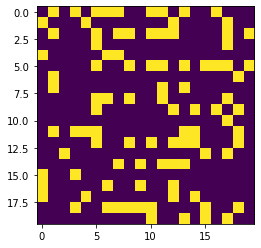

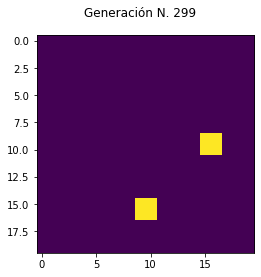

In [6]:
#Importacion de Librerias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#Creacion de matriz de ceros inicial
Grid  = np.zeros((20,20))

#Semilla a usar
np.random.seed(12345)

#Seleccion aleatoria de Celulas vivas en el estado inicial
Live_Cells = 112
idx = np.random.randint(len(Grid), size=(Live_Cells,2)) 
for i in range(0, Live_Cells):
  index = idx[i]
  Grid[index[0],index[1]] = 1

#Graficacion del estado inicial
plt.figure()
plt.imshow(Grid)

#Deficincion de funicion que compruebe si el elemento ij de la matriz estara vivo o muerto en la siguiente generacion
def comprobacion (matrix ,i ,j):
    r=np.zeros((len(Grid),len(Grid)))
    r[0,0]=matrix[np.mod(i-1,len(Grid))][np.mod(j-1,len(Grid))]
    r[0,1]=matrix[np.mod(i-1,len(Grid))][j]
    r[0,2]=matrix[np.mod(i-1,len(Grid))][np.mod(j+1,len(Grid))]
    r[1,0]=matrix[i][np.mod(j-1,len(Grid))]
    r[1,1]=matrix[i][j]
    r[1,2]=matrix[i][np.mod(j+1,len(Grid))]
    r[2,0]=matrix[np.mod(i+1,len(Grid))][np.mod(j-1,len(Grid))]
    r[2,1]=matrix[np.mod(i+1,len(Grid))][j]
    r[2,2]=matrix[np.mod(i+1,len(Grid))][np.mod(j+1,len(Grid))]
    N_vecinos = r[0,0] + r[0,1] + r[0,2] + r[1,0] + r[1,2] + r[2,0] + r[2,1] + r[2,2]
    if r[1,1] == 1 and N_vecinos >= 2 and N_vecinos <=3: 
        return 1
    if r[1,1] == 1 and ( N_vecinos < 2 or N_vecinos > 3 ): 
        return 0
    if r[1,1] == 0 and N_vecinos == 3:
        return 1
    else:
        return 0

#Definicion de funcion que asigne el elemento de la matriz en la proxima generacion
def Ciclo(Grid):
    Tamano_grid = Grid.shape[0]
    for i in range(Tamano_grid):
        for j in range(Tamano_grid):
            Grid[j][i] = comprobacion(Grid,i,j)
    return Grid

#Creacion de la animacion
import matplotlib.animation as animation
from IPython.display import HTML, Image
def Animar(i):
    Ciclo(Grid)
    ax1.clear()
    ax1.imshow(Grid)
    plt.suptitle('Generación N. {}'.format(i))

fig = plt.figure()
ax1 = fig.add_subplot()
animacion = animation.FuncAnimation(fig, Animar, interval=200,frames= 300)

animacion.save('Juego_de_la_vida.gif', writer='pillow', fps=60)
Image(url='Juego_de_la_vida.gif')

